## **Identify for each LED project/proposal how was the project's annual lighting cost calculated:**

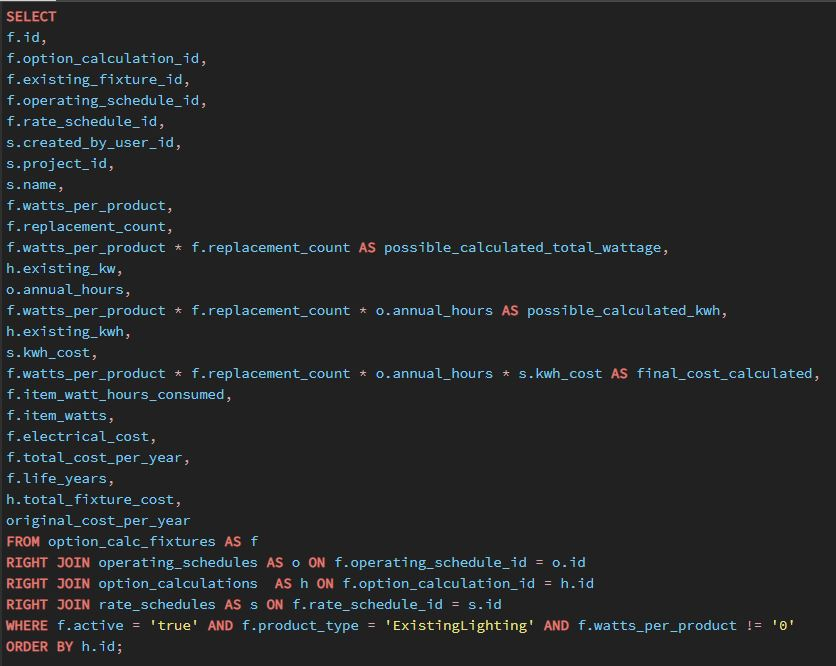

SELECT 
f.id,
f.option_calculation_id,
f.existing_fixture_id,
f.operating_schedule_id,
f.rate_schedule_id,
s.created_by_user_id,
s.project_id,
s.name,
f.watts_per_product,
f.replacement_count,
f.watts_per_product * f.replacement_count AS possible_calculated_total_wattage,
h.existing_kw,
o.annual_hours,
f.watts_per_product * f.replacement_count * o.annual_hours AS possible_calculated_kwh,
h.existing_kwh, 
s.kwh_cost,
f.watts_per_product * f.replacement_count * o.annual_hours * s.kwh_cost AS final_cost_calculated,
f.item_watt_hours_consumed,
f.item_watts,
f.electrical_cost,
f.total_cost_per_year,
f.life_years,
h.total_fixture_cost, 
original_cost_per_year
FROM option_calc_fixtures AS f
RIGHT JOIN operating_schedules AS o ON f.operating_schedule_id = o.id
RIGHT JOIN option_calculations  AS h ON f.option_calculation_id = h.id 
RIGHT JOIN rate_schedules AS s ON f.rate_schedule_id = s.id
WHERE f.active = 'true' AND f.product_type = 'ExistingLighting' AND f.watts_per_product != '0'
ORDER BY h.id;

Brief Explanation of what the Query does:

It uses as the base the "option_calc_fixtures" (f.) and it selects the columns that are useful for our project. With the data in this table we can calculate "total_wattage" by multiplying "watts_per_product" with the "replacement_count" (which I think is the number of lightings).Then we join it with the following tables:

(1) operating_schedules to get annual hours data and calculate kwh.

(2) option_calculations to get the id and enhance all the information.

(3) rate_schedules to get the kwh cost and calculate the total cost.

At the end I filtered the rows where active = TRUE, where the product type is "ExistingLighting" and where "watts_per_product" is not null.


You can find the dataset attached here:https://drive.google.com/drive/u/0/folders/1IbNMJ7PMnDHiWF3IWv6Fg4G8A8MIYHnZ 

Under the name: "original_cost_per_year"